## III -Exploratory Analysis
### A - HACRP Table
#### 1) Importing libraries

In [61]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
print("Imported all the required libraries")

Imported all the required libraries


#### 2) Querying data from the server

In [3]:
sql = """
SELECT * FROM "HACRP";"""
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "83.212.82.56",
    port = "5432",
    database = "dap_medicare")
    hacrp_df = sqlio.read_sql_query(sql, dbConnection) 
except (Exception, psycopg2.Error) as dbError:
    print ("Error while fetching db hacrp:", dbError)
finally:
    if(dbConnection): dbConnection.close()

#### 3) Descriptive Statistical Analysis

In [4]:
# list the data types for each column
hacrp_df.dtypes

provider_id                  int64
hospital_name               object
state                       object
fiscal_year                  int64
psi_90__start_date          object
psi_90_end_date             object
psi_90_w_z_score           float64
clabsi_w_z_score           float64
cauti_w_z_score            float64
ssi_w_z_score              float64
mrsa_w_z_score             float64
cdi_w_z_score              float64
hai_measures_start_date     object
hai_measures_end_date       object
total_hac_score            float64
payment_reduction           object
dtype: object

In [24]:
#summary of all numerical cols
hacrp_df.describe() 


,provider_id,fiscal_year,psi_90_w_z_score,clabsi_w_z_score,cauti_w_z_score,ssi_w_z_score,mrsa_w_z_score,cdi_w_z_score,total_hac_score
count,3224.000000,3224.0,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000
mean,262195.596154,2020.0,-0.002653,0.001730,0.000041,0.051203,0.001925,0.009630,-0.031398
std,162278.561407,0.0,0.994324,0.946566,0.976963,0.962591,0.948522,0.978784,0.595754
min,10001.000000,2020.0,-1.525800,-1.445900,-1.535400,-1.500000,-1.445300,-1.962600,-1.962600
25%,110110.500000,2020.0,-0.676850,-0.671885,-0.668800,-0.605175,-0.632900,-0.631400,-0.392150
50%,250089.000000,2020.0,-0.137100,-0.088410,-0.102770,-0.040660,-0.100200,-0.015400,-0.031398
75%,390117.500000,2020.0,0.462575,0.502785,0.537800,0.633675,0.499545,0.624700,0.331025
max,670128.000000,2020.0,2.357500,2.194100,2.185400,2.099600,2.250200,1.971000,2.357500


In [25]:
#summary of all numerical cols
hacrp_df.describe(include=['object']) 

,hospital_name,state,psi_90__start_date,psi_90_end_date,hai_measures_start_date,hai_measures_end_date,payment_reduction
count,3224,3224,3224,3224,3224,3224,3224
unique,3130,51,1,1,1,1,2
top,ST JOSEPH HOSPITAL,TX,2016-07-01,2018-06-30,2017-01-01,2018-12-31,No
freq,7,297,3224,3224,3224,3224,2438


In [60]:
#frst 30 & last 30 items
hacrp_df.head()

,provider_id,hospital_name,state,fiscal_year,psi_90__start_date,psi_90_end_date,psi_90_w_z_score,clabsi_w_z_score,cauti_w_z_score,ssi_w_z_score,mrsa_w_z_score,cdi_w_z_score,hai_measures_start_date,hai_measures_end_date,total_hac_score,payment_reduction
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,2020,2016-07-01,2018-06-30,0.0144,1.03250,0.11600,-1.24030,-0.55330,-0.4571,2017-01-01,2018-12-31,-0.1813,No
1,10005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,AL,2020,2016-07-01,2018-06-30,0.1869,2.19410,-0.14060,-0.16810,2.25020,-0.6434,2017-01-01,2018-12-31,0.6132,Yes
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,2020,2016-07-01,2018-06-30,0.2308,0.32630,0.77920,-0.65080,0.83250,-0.7786,2017-01-01,2018-12-31,0.1232,No
3,10007,MIZELL MEMORIAL HOSPITAL,AL,2020,2016-07-01,2018-06-30,-0.0548,-0.85836,-1.53540,-0.28418,0.18616,-0.7877,2017-01-01,2018-12-31,-0.7926,No
4,10008,CRENSHAW COMMUNITY HOSPITAL,AL,2020,2016-07-01,2018-06-30,-0.0047,0.68718,0.00424,0.24306,0.04848,-0.7384,2017-01-01,2018-12-31,-0.0047,No


In [60]:
#finding correlations between columns
df_relate=hacrp_df[['psi_90_w_z_score','clabsi_w_z_score','cauti_w_z_score','ssi_w_z_score','mrsa_w_z_score',
              'cdi_w_z_score','total_hac_score']].corr()
#all scores have significant positive correlation with total_hac_score
df_relate



,psi_90_w_z_score,clabsi_w_z_score,cauti_w_z_score,ssi_w_z_score,mrsa_w_z_score,cdi_w_z_score,total_hac_score
psi_90_w_z_score,1.000000,0.054880,0.067364,0.108552,0.055218,0.075762,0.438976
clabsi_w_z_score,0.054880,1.000000,0.389287,0.218769,0.363397,0.212111,0.564743
cauti_w_z_score,0.067364,0.389287,1.000000,0.258146,0.190458,0.271299,0.595366
ssi_w_z_score,0.108552,0.218769,0.258146,1.000000,0.168391,0.139505,0.480069
mrsa_w_z_score,0.055218,0.363397,0.190458,0.168391,1.000000,0.283195,0.514131
cdi_w_z_score,0.075762,0.212111,0.271299,0.139505,0.283195,1.000000,0.580169
total_hac_score,0.438976,0.564743,0.595366,0.480069,0.514131,0.580169,1.000000


#### 4) Grouping by state

In [34]:
hacrp_df['state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [55]:
#grouping hospitals by state
df_group_one = hacrp_df[['hospital_name','state','total_hac_score','payment_reduction']]
# grouping results
df_group_one = df_group_one.groupby(['state','payment_reduction'],as_index=False).mean()
grouped_pivot = df_group_one.pivot(index='state',columns='payment_reduction')
grouped_pivot


total_hac_score          
payment_reduction              No       Yes
state                                      
AK                      -0.428033  0.806380
AL                      -0.337154  0.694825
AR                      -0.359825  0.805320
AZ                      -0.333786  0.792327
CA                      -0.194304  0.682902
CO                      -0.221725  0.761819
CT                      -0.224925  0.666686
DC                      -0.189567  0.823733
DE                      -0.123700  0.432300
FL                      -0.239898  0.708916
GA                      -0.290089  0.687308
HI                      -0.371682  0.763300
IA                      -0.365586  0.513183
ID                      -0.466100  0.513200
IL                      -0.241697  0.747384
IN                      -0.367617  0.557629
KS                      -0.447135  0.662270
KY                      -0.338439  0.752772
LA                      -0.286768  0.805004
MA                      -0.146152  0.582692
MD                       0.312492       NaN
ME                      -0.194969  0.714700
MI                      -0.295382  0.678000
MN                      -0.193537  0.673927
MO                      -0.178678  0.718658
MS                      -0.270732  0.966277
MT                      -0.190592  0.614700
NC                      -0.230561  0.750295
ND                      -0.051020  0.724433
NE                      -0.305400  0.607100
NH                      -0.206437  0.583660
NJ                      -0.167984  0.679680
NM                      -0.276037  0.651040
NV                      -0.362984  0.884090
NY                      -0.163579  0.833996
OH                      -0.320221  0.718250
OK                      -0.491360  0.738485
OR                      -0.368313  0.872750
PA                      -0.335243  0.569648
RI                      -0.112467  0.896714
SC                      -0.368229  0.667789
SD                      -0.527653  0.836400
TN                      -0.340365  0.679005
TX                      -0.300073  0.789383
UT                      -0.242315  0.426433
VA                      -0.251876  0.812627
VT                      -0.306475  0.833450
WA                      -0.210633  0.659071
WI                      -0.390306  0.545972
WV                      -0.317619  0.733614
WY                      -0.365987  1.007867

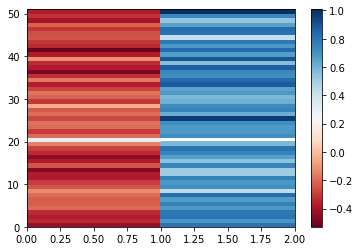

In [72]:
#use the grouped results- Heatmap
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

#### 5) ANOVA

In [83]:
grouped_test2=hacrp_df[['state', 'total_hac_score']].groupby(['state'])
grouped_test2.head()

,state,total_hac_score
0,AL,-0.1813
1,AL,0.6132
2,AL,0.1232
3,AL,-0.7926
4,AL,-0.0047
...,...,...
3150,WY,-0.7315
3151,WY,-1.2344
3152,WY,-0.1449
3153,WY,0.2390


In [84]:
grouped_test2.get_group('WY')['total_hac_score']

3150   -0.731500
3151   -1.234400
3152   -0.144900
3153    0.239000
3154   -1.074600
3155   -0.015700
3156    0.431200
3157    0.452300
3158    0.065600
3159   -0.031398
3160    2.140100
Name: total_hac_score, dtype: float64

In [104]:
#Finding highest frequency of states
hacrp_df['state'].mode()

0    TX
dtype: object

In [107]:
#Finding lowest frequency of states
hacrp_df['state'].value_counts(ascending=True)

VT      6
DE      6
DC      6
AK      8
ND      8
RI     10
WY     11
HI     12
NH     13
MT     14
ID     15
ME     17
SD     18
NE     23
NV     23
WV     28
CT     30
NM     32
UT     32
OR     34
IA     34
AR     46
MD     47
CO     48
WA     49
MN     49
KS     50
SC     53
MA     55
AZ     61
MS     63
KY     64
WI     64
NJ     64
MO     70
VA     74
OK     78
AL     81
IN     83
TN     84
LA     84
NC     85
MI     93
GA     99
OH    123
IL    125
PA    147
NY    147
FL    166
CA    295
TX    297
Name: state, dtype: int64

In [108]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('VT')['total_hac_score'], grouped_test2.get_group('AK')['total_hac_score'], grouped_test2.get_group('TX')['total_hac_score'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 


ANOVA results: F= 2.3374529729598144 , P = 0.09828427706083467


##### Since the F value is small and p-value is not significant we can state that there is difference in means of different states wrt total_hac_score.
###### Even though the three sample means are different, we do not have a statistically significant difference.

#### 5) Visualising the data


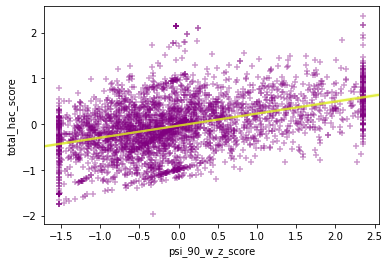

In [128]:

sns.regplot(x="psi_90_w_z_score", y="total_hac_score",scatter_kws = {"color": "purple", "alpha": 0.4}, line_kws = {"color": "#DCEB1F", "alpha": 0.8},marker="+",data=hacrp_df)

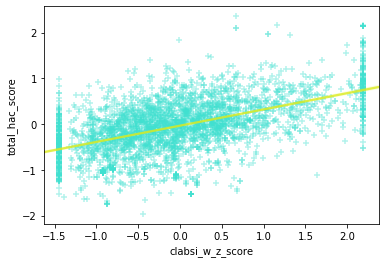

In [129]:
sns.regplot(x="clabsi_w_z_score", y="total_hac_score",scatter_kws = {"color": "turquoise", "alpha": 0.4}, line_kws = {"color": "#DCEB1F", "alpha": 0.8},marker="+",data=hacrp_df)

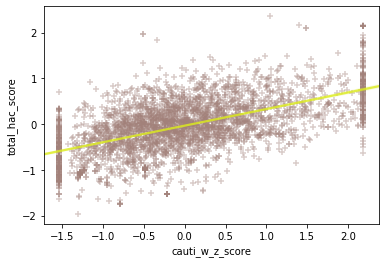

In [132]:
sns.regplot(x="cauti_w_z_score", y="total_hac_score", scatter_kws = {"color": "#A2817A", "alpha": 0.4}, line_kws = {"color": "#DCEB1F", "alpha": 0.8},marker="+",data=hacrp_df)

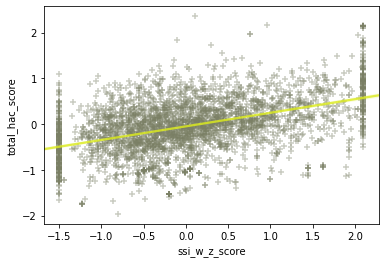

In [131]:
sns.regplot(x="ssi_w_z_score", y="total_hac_score",scatter_kws = {"color": "#7A7F64", "alpha": 0.4}, line_kws = {"color": "#DCEB1F", "alpha": 0.8}, marker="+",data=hacrp_df)

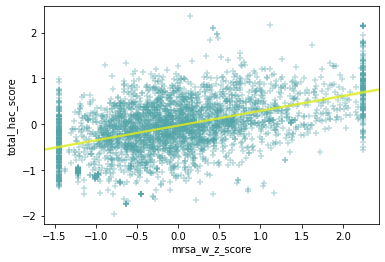

In [133]:
sns.regplot(x="mrsa_w_z_score", y="total_hac_score",scatter_kws = {"color": "#53A4A8", "alpha": 0.4}, line_kws = {"color": "#DCEB1F", "alpha": 0.8},marker="+", data=hacrp_df)

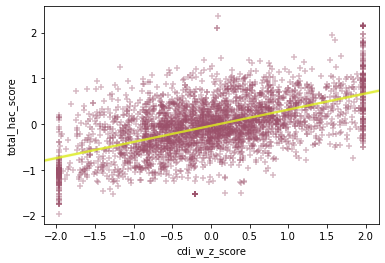

In [134]:
sns.regplot(x="cdi_w_z_score", y="total_hac_score",scatter_kws = {"color": "#9B506A", "alpha": 0.4}, line_kws = {"color": "#DCEB1F", "alpha": 0.8}, marker="+",data=hacrp_df)

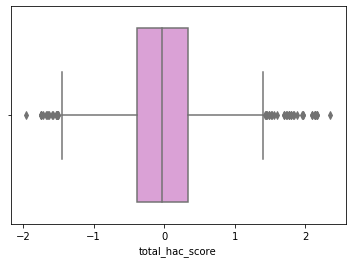

In [136]:
sns.boxplot(x="total_hac_score", color="#E398DE", data=hacrp_df)
#there are some outliers in total_hac_score

#### 4) Visualising the data- categorical



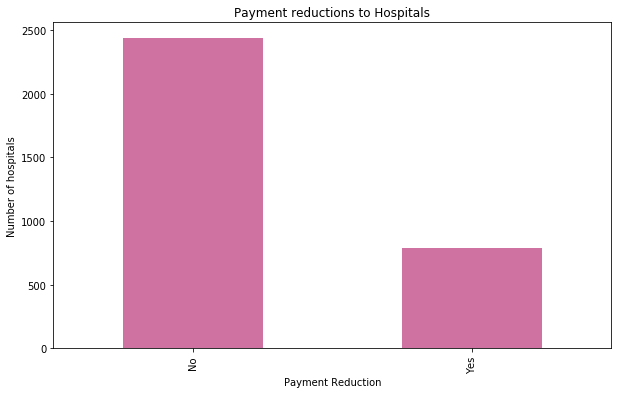

In [52]:
#payment_reduction
hacrp_df['payment_reduction'].value_counts().plot(kind='bar', figsize=(10, 6),color="#CF71A1")

plt.xlabel('Payment Reduction') # add to x-label to the plot
plt.ylabel('Number of hospitals') # add y-label to the plot
plt.title('Payment reductions to Hospitals') # add title to the plot

plt.show()

In [57]:
# group hospitals by states and apply sum() function 
df_num = hacrp_df[['psi_90_w_z_score','clabsi_w_z_score','cauti_w_z_score','ssi_w_z_score','mrsa_w_z_score',
              'cdi_w_z_score','total_hac_score','state']]
df_hospitals = abs(df_num.groupby('state', axis=0).sum())

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_num.groupby('state', axis=0)))
df_hospitals.sort_values(by='total_hac_score', ascending=True, inplace=True)
df_h_plot = df_hospitals.head(6)
df_h_plot

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,psi_90_w_z_score,clabsi_w_z_score,cauti_w_z_score,ssi_w_z_score,mrsa_w_z_score,cdi_w_z_score,total_hac_score
state,,,,,,,
MN,4.265000,4.772860,8.199820,20.472220,24.295440,8.974120,0.058800
WY,3.047182,1.563607,2.352197,0.420406,0.613078,4.101543,0.095702
SC,2.522600,4.968140,14.674640,1.061700,2.194520,6.553900,0.168200
ME,4.500000,0.963620,3.455500,1.496800,3.381840,0.462500,0.324200
DE,3.441100,2.841600,1.052500,0.673200,1.965700,3.964700,0.369800
VT,1.133100,3.249700,3.940020,2.988800,2.609300,1.495600,0.441000


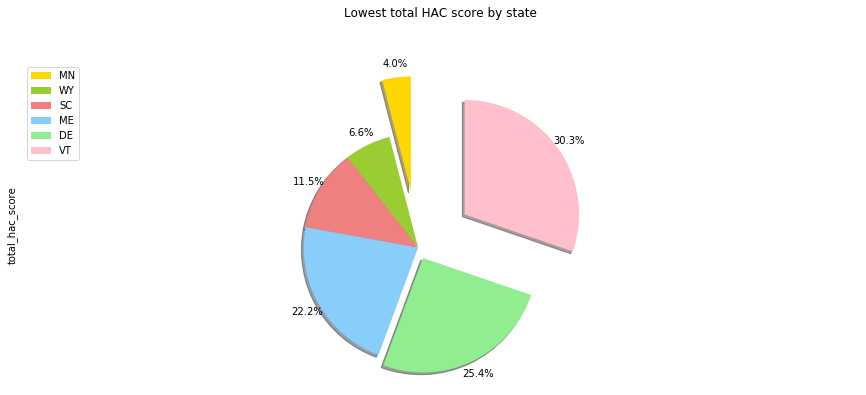

In [58]:
# autopct create %, start angle represent starting point

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.5, 0, 0, 0, 0.1, 0.5] # ratio for each state with which to offset each wedge.

df_h_plot['total_hac_score'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 6 states
                            )

# scale the title up by 12% to match pctdistance
plt.title('Lowest total HAC score by state', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_h_plot.index, loc='upper left') 

plt.show()

In [24]:
df_hospitals.sort_values(by='total_hac_score', ascending=False, inplace=True)
df_h1_plot = df_hospitals.head(6)
df_h1_plot

,psi_90_w_z_score,clabsi_w_z_score,cauti_w_z_score,ssi_w_z_score,mrsa_w_z_score,cdi_w_z_score,total_hac_score
state,,,,,,,
NY,88.287860,18.569540,33.405440,34.861040,17.445840,2.634440,31.818100
TX,49.228172,34.927987,33.076287,7.286772,18.934629,19.958444,31.380490
PA,20.133325,34.603953,35.354655,2.175391,43.166365,0.449787,30.277996
CA,10.563742,51.666013,79.028843,31.473806,11.799538,30.821843,26.892102
OK,17.218362,0.390427,15.047937,0.951806,7.341262,27.263977,22.338098
OH,31.447062,11.401627,25.748657,0.797754,8.430138,8.583357,16.540798


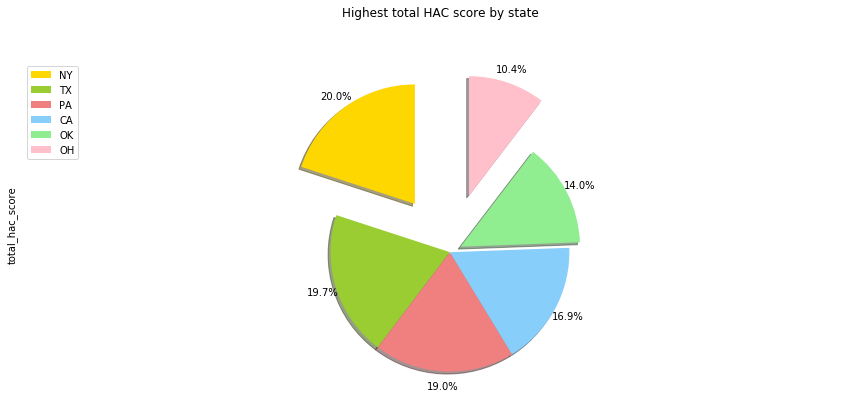

In [59]:
# autopct create %, start angle represent starting point

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.5, 0, 0, 0, 0.1, 0.5] # ratio for each state with which to offset each wedge.

df_h1_plot['total_hac_score'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' highest 6 states
                            )

# scale the title up by 12% to match pctdistance
plt.title('Highest total HAC score by state', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_h1_plot.index, loc='upper left') 

plt.show()